In [1]:
# 1. Carga y unión de datos
import pandas as pd
import os

# Definir ruta base
base_path = r"D:\HP\Downloads\Ganancias de los eSports"

# Cargar archivos CSV
df_players = pd.read_csv(os.path.join(base_path, "highest_earning_players.csv"))
df_teams = pd.read_csv(os.path.join(base_path, "highest_earning_teams.csv"))
df_country_codes = pd.read_csv(os.path.join(base_path, "country-and-continent-codes-list.csv"))

# Explorar brevemente
print(df_players.head())
print(df_teams.head())
print(df_country_codes.head())


   PlayerId NameFirst   NameLast CurrentHandle CountryCode  TotalUSDPrize  \
0      3883     Peter  Rasmussen       dupreeh          dk     1822989.41   
1      3679   Andreas   Højsleth         Xyp9x          dk     1799288.57   
2      3885   Nicolai     Reedtz        dev1ce          dk     1787489.88   
3      3672     Lukas  Rossander        gla1ve          dk     1652350.75   
4     17800      Emil       Reif        Magisk          dk     1416448.64   

                               Game                 Genre  
0  Counter-Strike: Global Offensive  First-Person Shooter  
1  Counter-Strike: Global Offensive  First-Person Shooter  
2  Counter-Strike: Global Offensive  First-Person Shooter  
3  Counter-Strike: Global Offensive  First-Person Shooter  
4  Counter-Strike: Global Offensive  First-Person Shooter  
   TeamId             TeamName  TotalUSDPrize  TotalTournaments       Game  \
0     760  San Francisco Shock      3105000.0                 7  Overwatch   
1     776      London

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB
None
           PlayerId  TotalUSDPrize
count   1000.000000   1.000000e+03
mean   27793.587000   3.977932e+05
std    22170.225194   6.908492e+05
min     1000.000000   2.417167e+04
25%     5374.500000   8.378962e+04
50%    23502.000000   1.683284e+05
75%    48127.250000   3.937352e+05
max    83085.000000   6.952597e+06
PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle  

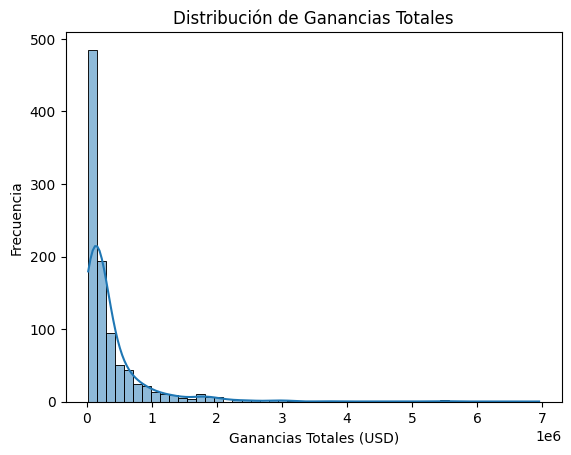

Valores únicos en Game: 10


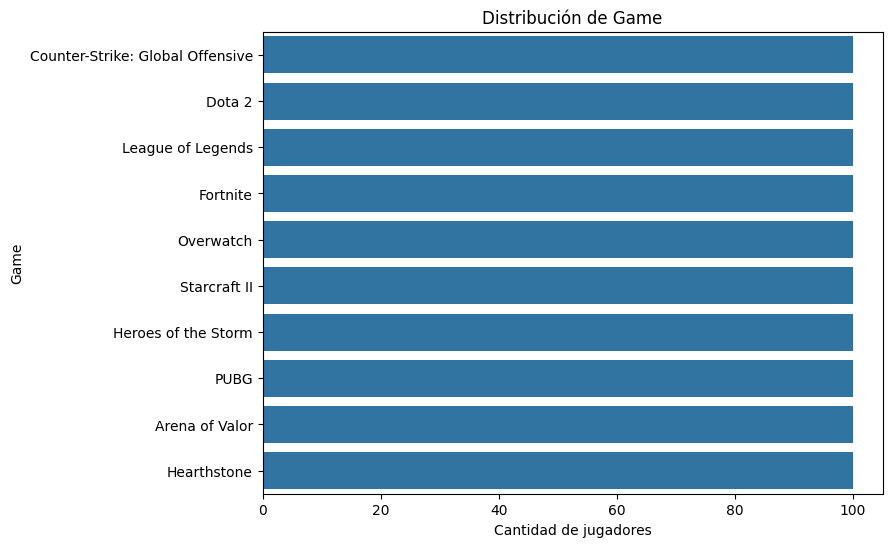

Valores únicos en Genre: 5


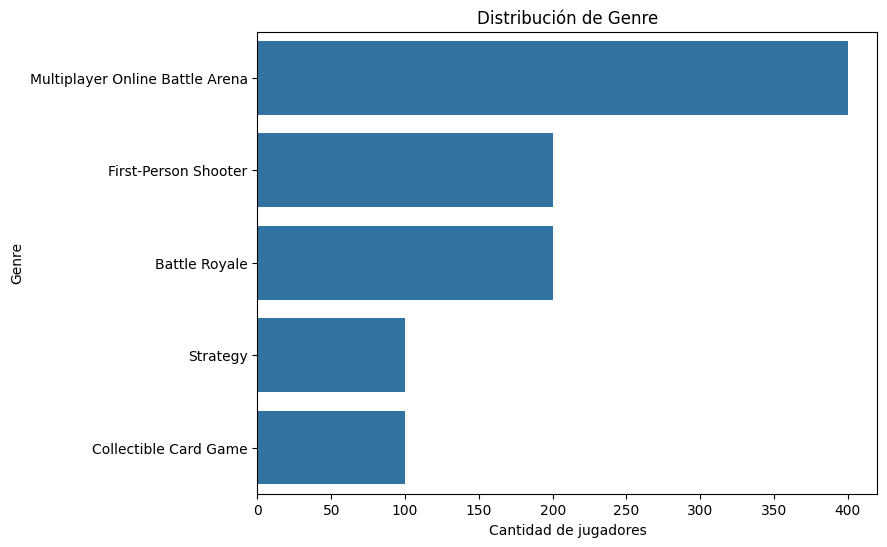

Valores únicos en CountryCode: 56


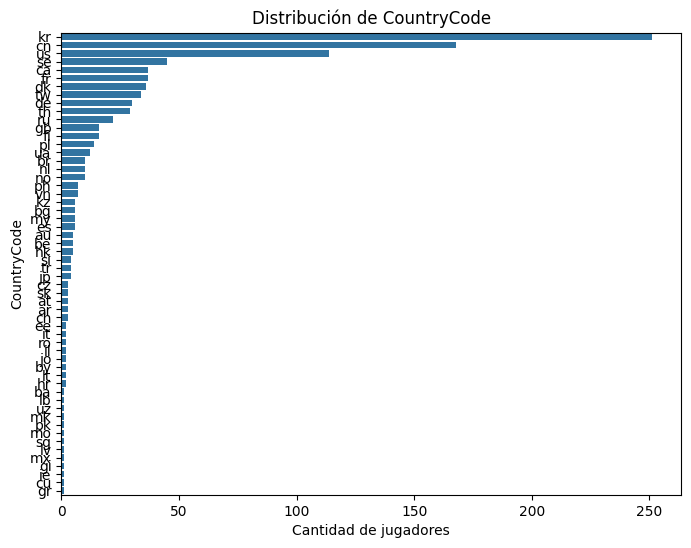

In [2]:
# 2. Análisis Exploratorio de Datos (EDA)

# Información general y tipos de datos
print(df_players.info())

# Estadísticas descriptivas de variables numéricas
print(df_players.describe())

# Revisión de valores faltantes
print(df_players.isnull().sum())

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo
sns.histplot(df_players['TotalUSDPrize'], bins=50, kde=True)
plt.title("Distribución de Ganancias Totales")
plt.xlabel("Ganancias Totales (USD)")
plt.ylabel("Frecuencia")
plt.show()

# Análisis de variables categóricas: actualizar nombres de columnas según tu dataset
categorical_cols = ['Game', 'Genre', 'CountryCode']

for col in categorical_cols:
    print(f"Valores únicos en {col}: {df_players[col].nunique()}")
    plt.figure(figsize=(8,6))
    sns.countplot(y=df_players[col], order=df_players[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xlabel("Cantidad de jugadores")
    plt.ylabel(col)
    plt.show()


In [ ]:
#3. Feature Engineering y Selección

# Selección de las características (features) y la variable objetivo (target)
features = ['Game', 'Genre', 'CountryCode']
target = 'TotalUSDPrize'

# Aplicar One-Hot Encoding a las variables categóricas.
# Esto convierte las categorías en columnas numéricas (0s y 1s) que el modelo puede procesar.
# 'drop_first=True' se utiliza para evitar la multicolinealidad, eliminando una categoría por cada característica.
df_encoded = pd.get_dummies(df_players[features], drop_first=True)

# Combinar las nuevas características codificadas con la variable objetivo.
# Ahora df_model contiene todos los datos listos para el entrenamiento.
df_model = pd.concat([df_encoded, df_players[target]], axis=1)

# Visualizar las primeras filas del nuevo DataFrame para verificar el resultado.
print("DataFrame listo para el modelo:")
print(df_model.head())
